# **Assignment 2 - Computational Mathematics**
by sabina abdikhalikova SE-2320

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import cmath

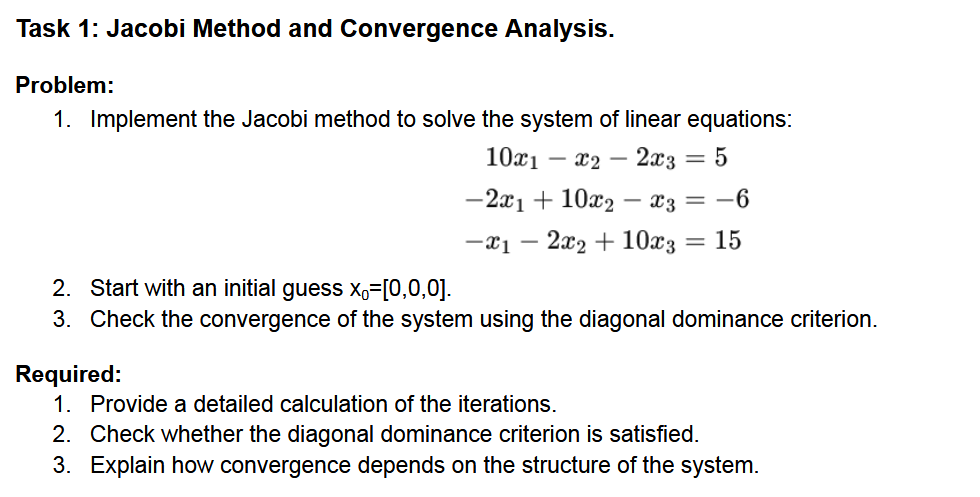

In [67]:
# Task 1: Jacobi Method and Convergence Analysis
import numpy as np

def jacobi_method(A, b, x0, tol = 1e-5, max_iter = 100):
    n = len(b)
    x = x0
    for i in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            summation = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]
        # Checking if we have achieved the desired accuracy
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i + 1
        x = x_new
        print(x)
    return x, max_iter

A = np.array([[10, -1, -2],
              [-2, 10, -1], 
              [-1, -2, 10]], dtype=float)
b = np.array([5, -6, 15], dtype=float)
x0 = np.zeros(len(b))

# Checking diagonal dominance
def is_diagonally_dominant(A):
    for i in range(len(A)):
        if abs(A[i, i]) < sum(abs(A[i, j]) for j in range(len(A)) if i != j):
            return False
    return True

diagonally_dominant = is_diagonally_dominant(A)
solution, iterations = jacobi_method(A, b, x0)

print("Diagonally Dominant:", diagonally_dominant)
print("Root:", solution)
print("Iterations:", iterations)

[ 0.5 -0.6  1.5]
[ 0.74 -0.35  1.43]
[ 0.751 -0.309  1.504]
[ 0.7699 -0.2994  1.5133]
[ 0.77272 -0.29469  1.51711]
[ 0.773953 -0.293745  1.518334]
[ 0.7742923 -0.293376   1.5186463]
[ 0.77439166 -0.29327691  1.51875403]
[ 0.77442312 -0.29324626  1.51878378]
Diagonally Dominant: True
Root: [ 0.77443213 -0.293237    1.51879306]
Iterations: 3


For each row in the matrix, we compare the size of the main diagonal element to the total size of all other elements in that row.

If the diagonal element is larger than the combined size of the other elements in every row, the matrix **is** diagonally dominant.
If even one row fails this condition, the matrix is **not** diagonally dominant.

Diagonal dominance helps ensure that the Jacobi method will find the correct solution. It means that each variable in the system depends more on itself than on the other variables, which keeps the calculations stable.

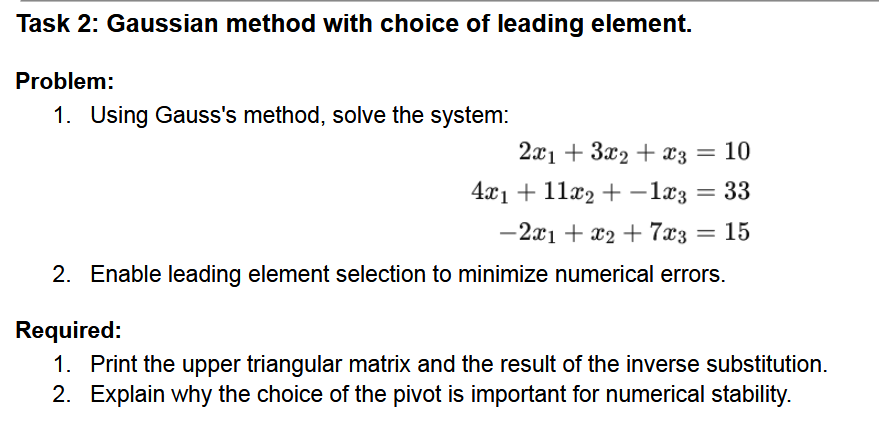

In [68]:
# Task 2: Gaussian Method
def gauss_elimination(A, b):
    n = len(b)
    # Direct move (transformation to upper triangular matrix)
    for i in range(n):
        # Finding the maximum element to prevent division by 0
        max_row = np.argmax(abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

A = np.array([[2, 3, 1],
              [4, 11, -1],
              [-2, 1, 7]], dtype=float)
b = np.array([10, 33, 15], dtype=float)

solution = gauss_elimination(A.copy(), b.copy())
print("Root:", solution)


Root: [-0.86538462  3.44230769  1.40384615]


When working with finite precision, small numerical errors can grow as calculations proceed.
Without pivoting, the algorithm might attempt to divide by a small number, leading to numerical instability or incorrect results.
Pivoting ensures that the matrix remains well-conditioned, meaning that the computed solution is closer to the actual solution of the system.

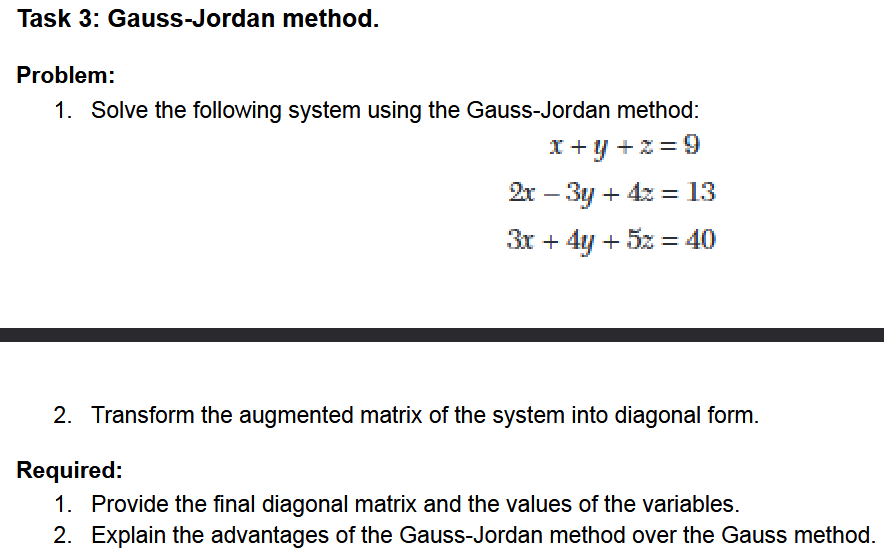

In [69]:
def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack([A, b.reshape(-1, 1)])

    # Direct move (transformation to diagonal matrix)
    for i in range(n):
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]  # Normalize the string
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]
            print(augmented_matrix[:, -1])
        print()
    return augmented_matrix[:, -1]

# Example
A = np.array([[1, 1, 1],
              [2, -3, 4],
              [3, 4, 5]], dtype=float)
b = np.array([9, 13, 40], dtype=float)

# Solution by Gauss Jordan method
root = gauss_jordan(A, b)
print(f"Root: {root}")

[ 9. 13. 40.]
[ 9. -5. 40.]
[ 9. -5. 13.]

[ 8.  1. 13.]
[ 8.  1. 13.]
[ 8.  1. 12.]

[1. 1. 5.]
[1. 3. 5.]
[1. 3. 5.]

Root: [1. 3. 5.]


The solution is directly obtained after reducing the matrix to diagonal form, eliminating the need for back substitution.
Easily computes the inverse of a matrix by appending an identity matrix and reducing it to diagonal form.
Can handle systems with multiple right-hand sides simultaneously, saving computation time.

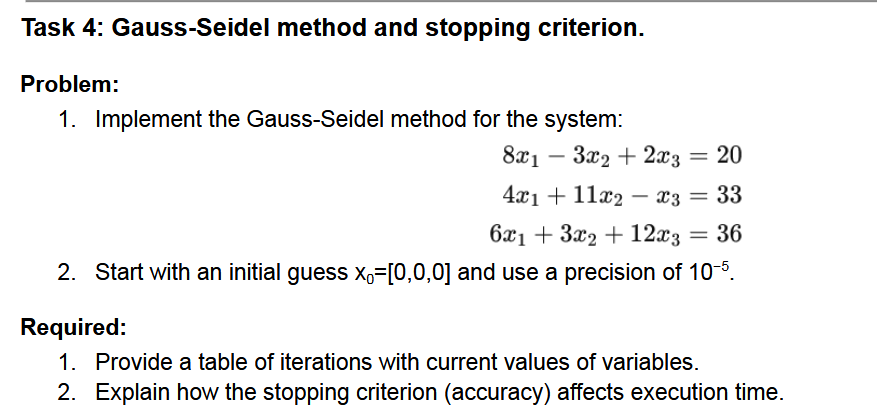

In [70]:
def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100):
    n = len(b)
    x = x0
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]
        # Checking the stopping condition
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1
        x = x_new
        print(x)
    return x, max_iter

# Example
A = np.array([[8, -3, 2],
              [4, 11, -1],
              [6, 3, 12]], dtype=float)
b = np.array([20, 33, 36], dtype=float)
x0 = np.zeros(len(b))

# Solution by Gauss-Seidel method
root, iteration = gauss_seidel(A, b, x0)
print(f"Root: {np.round(root,1)}\nIterations: {iteration}")

[2.5        2.09090909 1.22727273]
[2.97727273 2.02892562 1.00413223]
[3.00981405 1.99680691 0.99589125]
[2.99982978 1.99968838 1.00016302]
[2.99984239 2.00007213 1.00006077]
[3.00001186 2.00000121 0.99999377]
[3.00000201 1.9999987  0.99999932]
[2.99999968 2.00000005 1.00000014]
Root: [3. 2. 1.]
Iterations: 9


Highter tolerances provide more precise solutions but take longer, (more iterations), while looser tolerances are faster but less accurate.

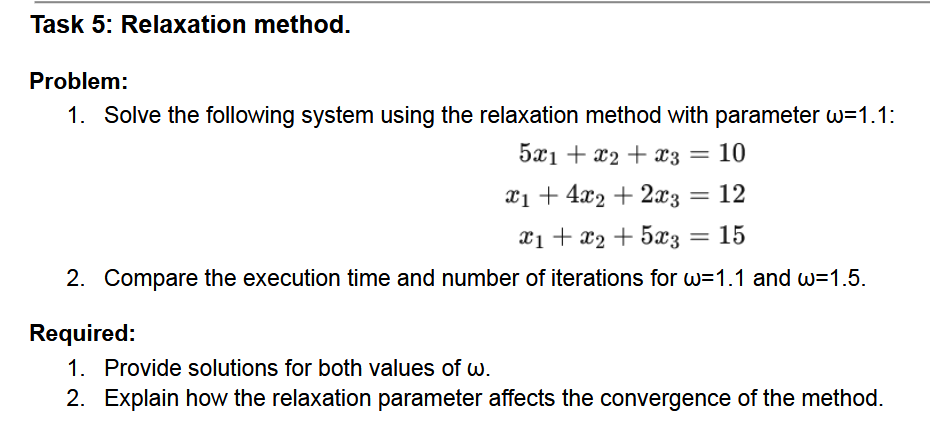

In [72]:
def relaxation_method(A, b, x0, omega, tol=1e-6, max_iter=100):
    n = len(b)
    x = x0
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - summation) / A[i][i]
        # Checking the stopping condition
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k 
        x = x_new
        print(x)
    return x, k

A = np.array([[5, 1, 1],
              [1, 4, 2],
              [1, 1, 5]], dtype=float)
b = np.array([10, 12, 15], dtype=float)
x0 = np.zeros(len(b))

# Solution by relaxation method
root1, iter1 = relaxation_method(A, b, x0, omega=1.1)
print()
root2, iter2 = relaxation_method(A, b, x0, omega=1.5)
print(f"1 Root: {np.round(root1)}\t Iter: {iter1}\n2 Root: {np.round(root2)}\t Iter: {iter2}")

[2.2    2.695  2.2231]
[0.898018   1.56084005 2.53674123]
[1.20873032 1.41630748 2.46881756]
[1.22439946 1.46380974 2.46171222]
[1.21394522 1.46584237 2.46427551]
[1.21397954 1.46421986 2.46436858]
[1.21431259 1.46423933 2.46428172]
[1.21429411 1.46429024 2.46428327]
[1.21428442 1.46428696 2.46428597]
[1.21428551 1.4642855  2.46428578]

[3.     3.375  2.5875]
[-0.28875     0.98015625  2.99882813]
[1.95067969 1.0292959  2.10659326]
[1.08389341 1.99894708 2.52185122]
[1.10181381 1.19595787 2.54974289]
[1.32538287 1.49269533 2.3797051 ]
[1.17558844 1.52802785 2.49906256]
[1.20407866 1.41015966 2.46619722]
[1.23505361 1.48212715 2.45174716]
[1.2023109  1.46925947 2.47265531]
[1.21627012 1.45477749 2.46235806]
[1.21672428 1.4695711  2.46293235]
[1.21188682 1.46355762 2.46590049]
[1.21521915 1.46308864 2.46355742]
[1.21439661 1.46538889 2.46428564]
[1.21389934 1.46387907 2.46452366]
[1.21452951 1.46421915 2.46411357]
[1.21423543 1.46446696 2.4643325 ]
[1.21424245 1.46417623 2.46430815]
[1.21

Larger ω (e.g., ω=1.5): A larger value of ω may speed up convergence but could also cause instability or overshooting. If ω is too large, the method might not converge.
Smaller ω (e.g., ω=1.1): A smaller value of ω tends to converge more slowly but is generally more stable.

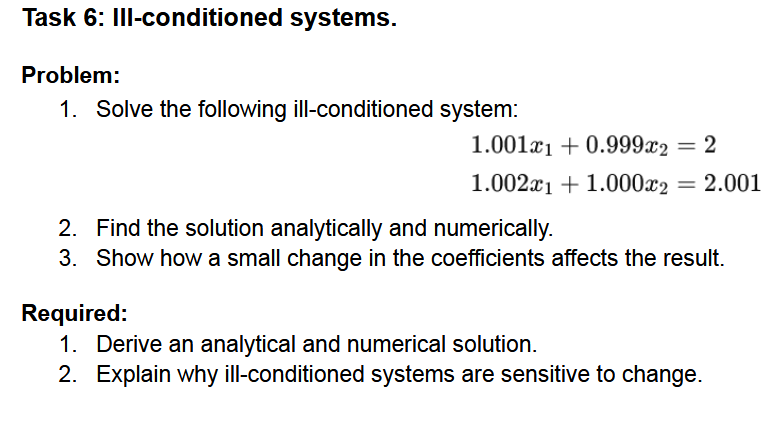